In [10]:
import pandas as pd
import matplotlib.pyplot as plt
titanic=pd.read_csv("titanic_passengers.csv")

# Titanic Tabulation

The RMS Titanic was a British ocean liner that unfortunately crashed and sunk in the early 1910s. The story of the Titanic's sinking has become a cultural staple in modern day society, and therefore records of the passangers have well preserved. Here I will be analyzing this data using pandas, and asking some intriguing questions regarding my analysis

### Question 1: What are the average age group of the passangers

<Axes: title={'center': 'Age groups of passangers'}, ylabel='Frequency'>

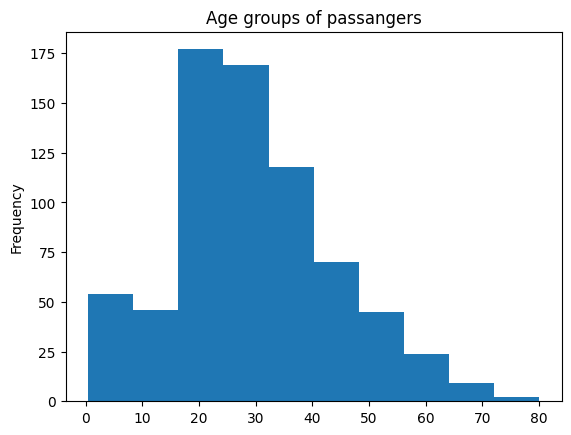

In [14]:
ages=titanic["Age"]

ages.plot(
    title="Age groups of passangers",
    kind="hist",
    
)